Median stop duration: 15.0 minutes
75% of stops last less than 30.0 minutes


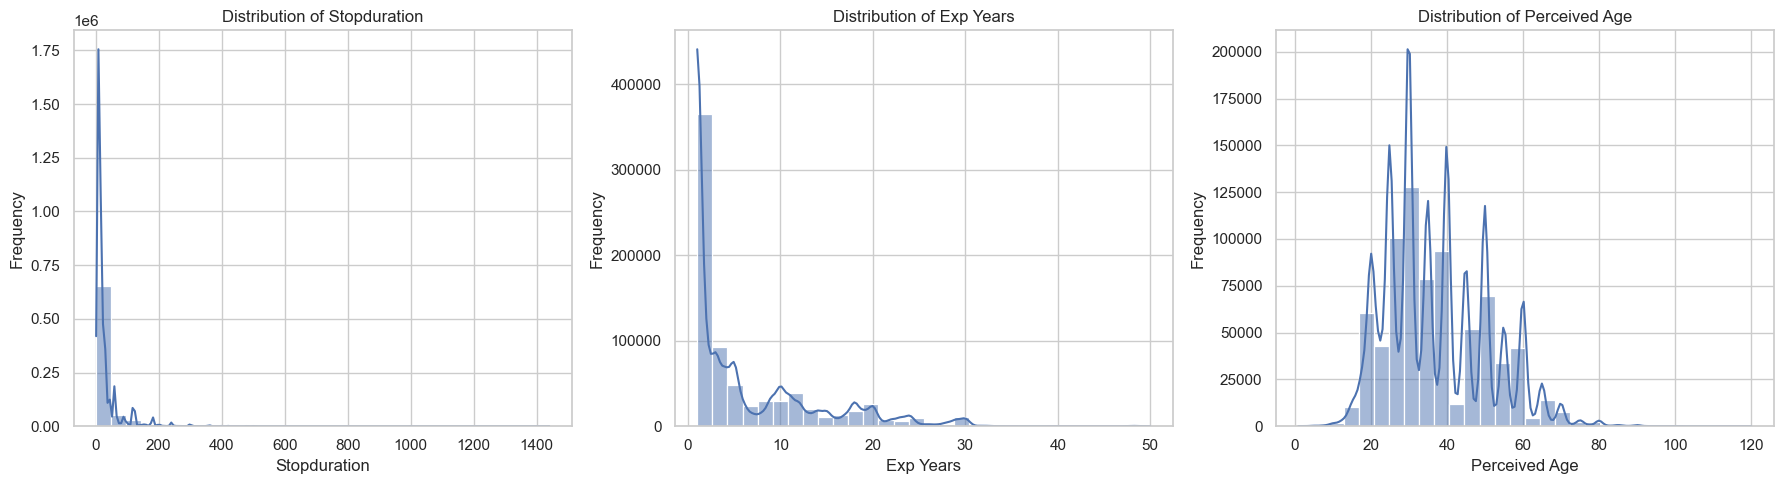

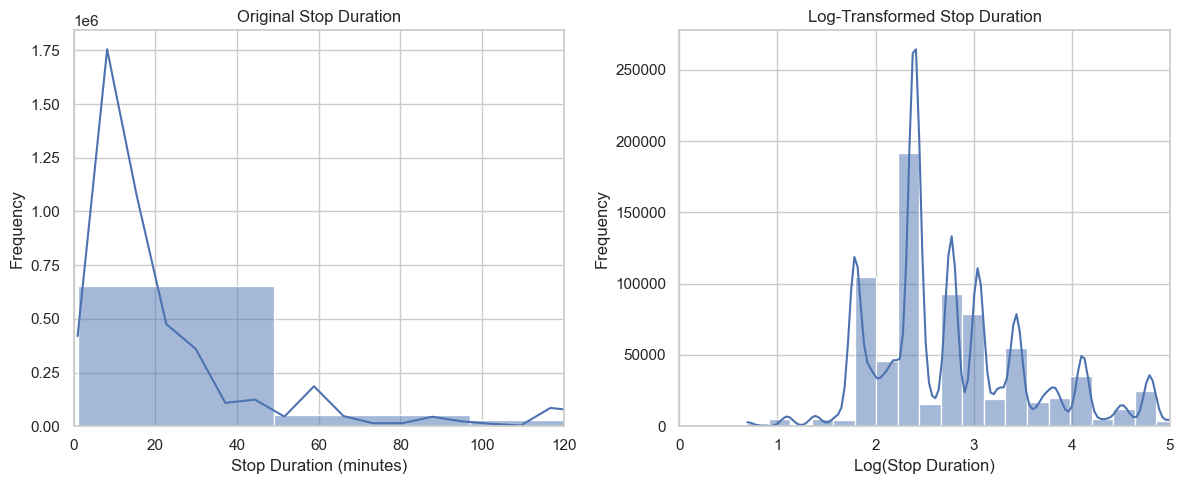


Median Stop Duration by Stop Reason:
reason_for_stop
School Discipline          125.0
Probable Cause             105.0
School Policy Violation     60.0
Outstanding Warrant         45.0
Consensual Search           20.0
On Parole/Probation         20.0
Reasonable Suspicion        20.0
Truancy Investigation       20.0
Traffic Violation           10.0
Name: stopduration, dtype: float64

Median Stop Duration by Race:
race
Black               15.0
Hispanic/Latino     15.0
Native American     15.0
Pacific Islander    12.0
White               12.0
Asian               10.0
Middle Eastern      10.0
Name: stopduration, dtype: float64


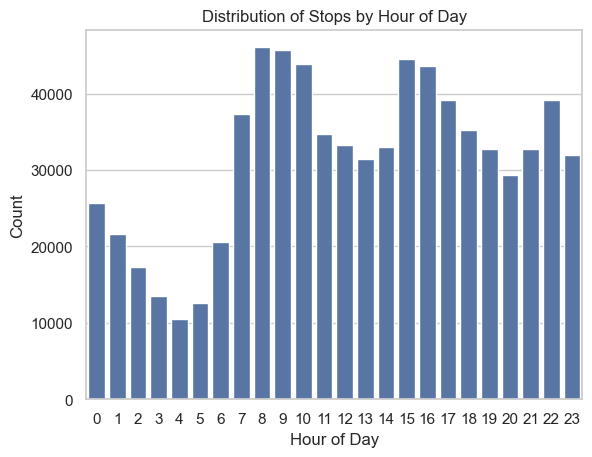

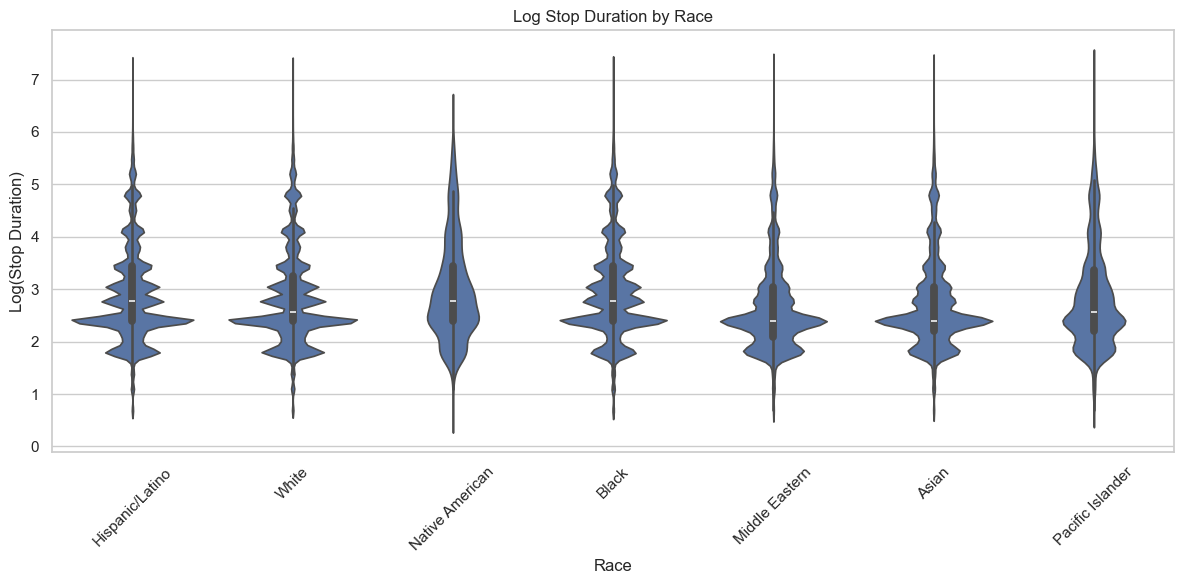

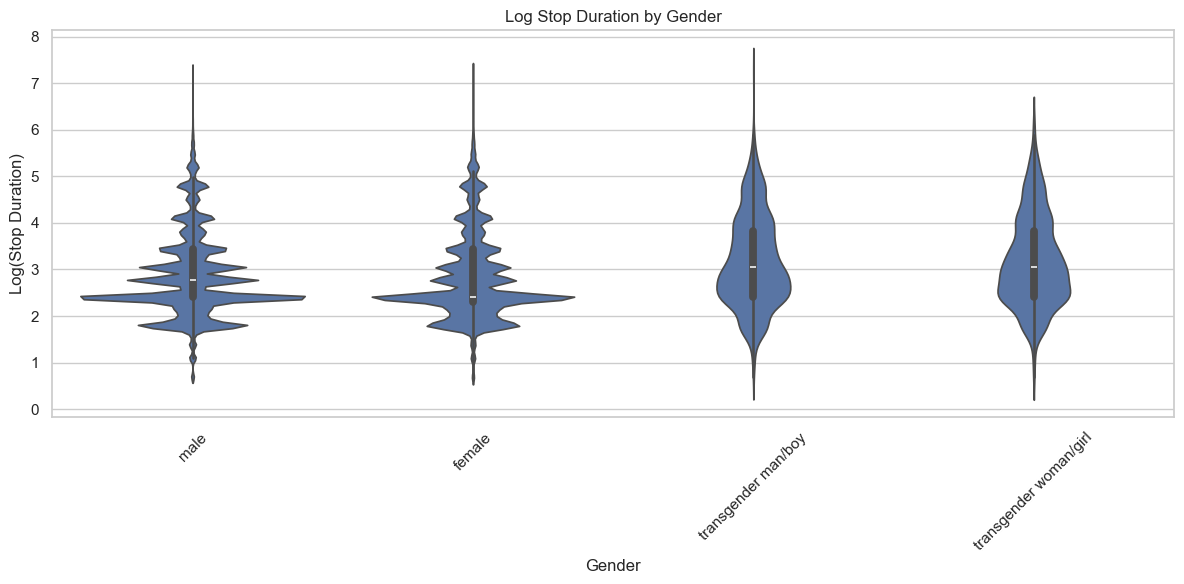

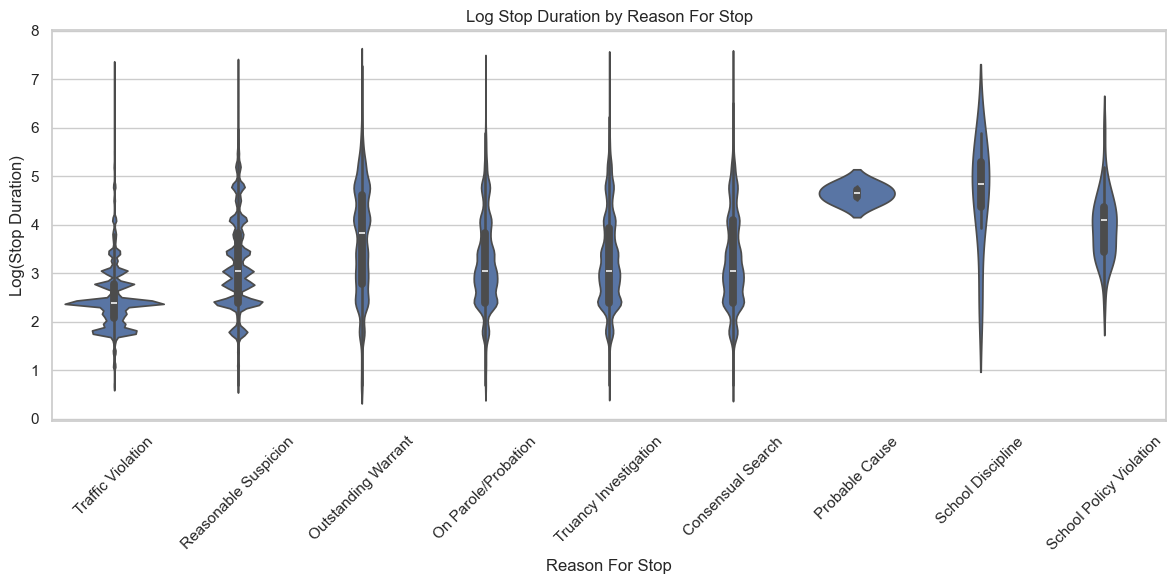

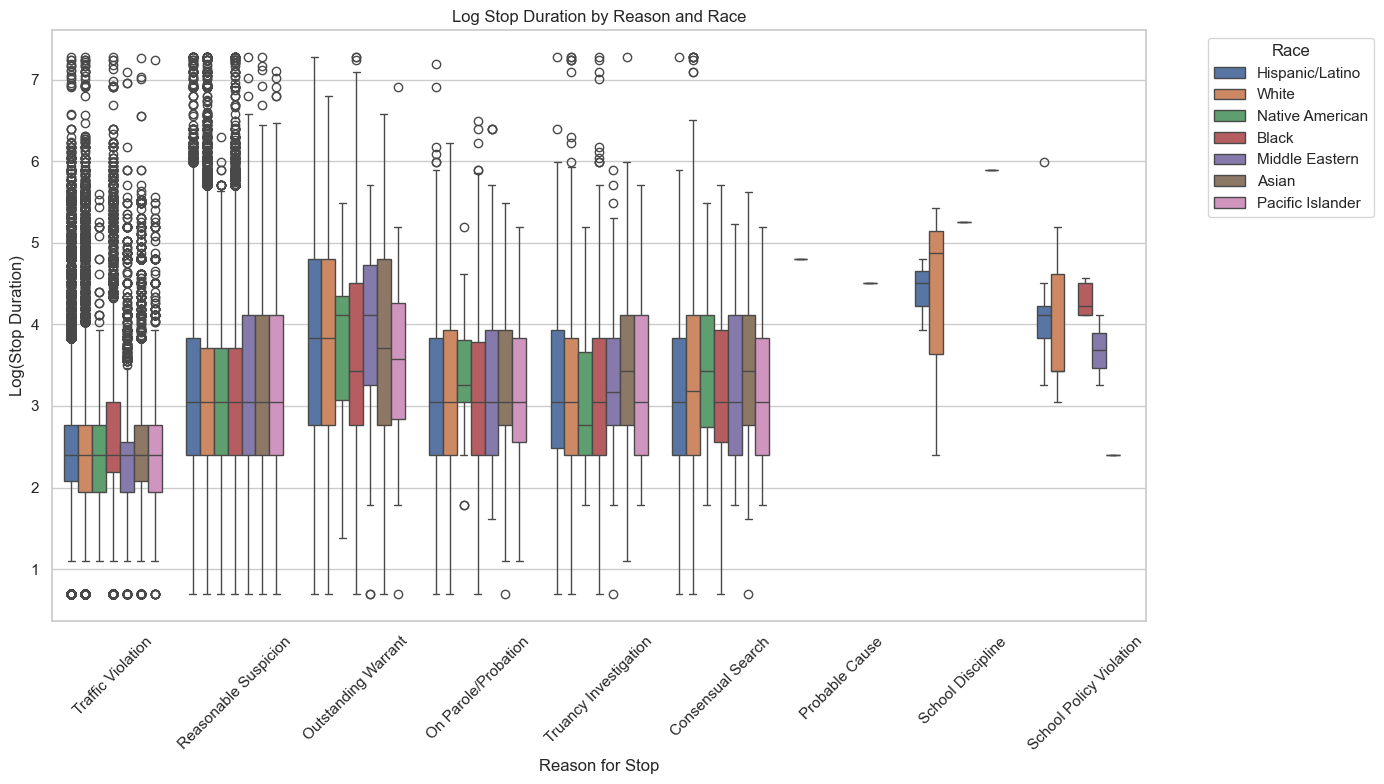


ANOVA p-value for racial differences in log stop duration: 0.0000


In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os

csv_directory = "C:/Users/harry/Springboard/Springboard/Capstone 2/data"
main_df = pd.read_csv(os.path.join(csv_directory, "cleaned_ripa_dataset.csv"), low_memory=False)

sns.set(style="whitegrid", palette="deep")

reason_mapping = {
    "traffic violation": "Traffic Violation",
    "reasonable suspicion": "Reasonable Suspicion",
    "knowledge of outstanding arrest warrant/wanted person": "Outstanding Warrant",
    "known to be on parole / probation / prcs / mandatory supervision": "On Parole/Probation",
    "investigation to determine whether the person was truant": "Truancy Investigation",
    "consensual encounter resulting in a search": "Consensual Search",
    "probable cause to arrest or search": "Probable Cause",
    "possible conduct warranting discipline under education code sections 48900, 48900.2, 48900.3, 48900.4 and 48900.7": "School Discipline",
    "determine whether the student violated school policy": "School Policy Violation"
}
race_mapping = {
    "hispanic/latino": "Hispanic/Latino",
    "white": "White",
    "native american": "Native American",
    "black/african american": "Black",
    "middle eastern or south asian": "Middle Eastern",
    "asian": "Asian",
    "pacific islander": "Pacific Islander"
}

main_df['reason_for_stop'] = main_df['reason_for_stop'].map(reason_mapping).fillna("Unknown")
main_df['race'] = main_df['race'].map(race_mapping).fillna("Unknown")

median_stop_duration = main_df['stopduration'].median()
percentile_75 = np.percentile(main_df['stopduration'], 75)
print(f"Median stop duration: {median_stop_duration:.1f} minutes")
print(f"75% of stops last less than {percentile_75:.1f} minutes")

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
num_vars = ['stopduration', 'exp_years', 'perceived_age']
for i, col in enumerate(num_vars):
    sns.histplot(main_df[col], ax=axes[i], kde=True, bins=30)
    axes[i].set_title(f'Distribution of {col.replace("_", " ").title()}')
    axes[i].set_xlabel(col.replace("_", " ").title())
    axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

main_df['log_stopduration'] = np.log1p(main_df['stopduration'])
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(main_df['stopduration'], kde=True, ax=axes[0], bins=30)
axes[0].set_xlim(0, 120)
axes[0].set_title('Original Stop Duration')
axes[0].set_xlabel('Stop Duration (minutes)')
axes[0].set_ylabel('Frequency')
sns.histplot(main_df['log_stopduration'], kde=True, ax=axes[1], bins=30)
axes[1].set_xlim(0, 5)
axes[1].set_title('Log-Transformed Stop Duration')
axes[1].set_xlabel('Log(Stop Duration)')
axes[1].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

reason_duration_median = main_df.groupby('reason_for_stop')['stopduration'].median().sort_values(ascending=False)
race_duration_median = main_df.groupby('race')['stopduration'].median().sort_values(ascending=False)
print("\nMedian Stop Duration by Stop Reason:")
print(reason_duration_median)
print("\nMedian Stop Duration by Race:")
print(race_duration_median)

main_df['hour'] = pd.to_datetime(main_df['time_stop'], format='%H:%M:%S').dt.hour
sns.countplot(x='hour', data=main_df)
plt.title("Distribution of Stops by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Count")
plt.show()

for var in ['race', 'gender', 'reason_for_stop']:
    plt.figure(figsize=(12, 6))
    sns.violinplot(x=main_df[var], y=main_df['log_stopduration'])
    plt.xticks(rotation=45)
    plt.title(f'Log Stop Duration by {var.replace("_", " ").title()}')
    plt.xlabel(var.replace("_", " ").title())
    plt.ylabel('Log(Stop Duration)')
    plt.tight_layout()
    plt.show()

plt.figure(figsize=(14, 8))
sns.boxplot(x='reason_for_stop', y='log_stopduration', hue='race', data=main_df)
plt.xticks(rotation=45)
plt.title('Log Stop Duration by Reason and Race')
plt.xlabel('Reason for Stop')
plt.ylabel('Log(Stop Duration)')
plt.legend(title='Race', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

groups = [group['log_stopduration'].values for name, group in main_df.groupby('race')]
f_stat, p_value = stats.f_oneway(*groups)
print(f"\nANOVA p-value for racial differences in log stop duration: {p_value:.4f}")

# Key Insights

The analysis revealed that stop durations are highly right-skewed, with most stops being brief, but a subset lasting significantly longer. These longer stops were often associated with specific stop reasons, particularly investigative and search-related stops, which consistently took more time compared to routine traffic stops. This suggests that certain types of stops inherently require more officer engagement, potentially due to procedural requirements or situational complexities.  

Examining stop duration by time of day showed a clear pattern where stops conducted in the evening and late-night hours tended to last longer. This could be due to a range of factors, such as reduced staffing, increased scrutiny at night, or the nature of incidents occurring during those hours.  

When analyzing stop duration across demographic groups, distinct disparities emerged. Certain racial and gender groups experienced longer stop durations on average, even when controlling for stop reason. This raises important questions about potential disparities in how different populations are treated during police encounters. Further analysis of interactions between variables showed that the effect of stop reason on duration was not uniform across demographic groups or time of day. For example, some groups faced longer delays for investigative stops compared to others, suggesting that stop outcomes are influenced by more than just the official reason for the stop.  

Initial statistical modeling confirmed that stop reason, time of day, and demographic factors are all significant predictors of stop duration. These findings point to systemic patterns in stop durations that may reflect both operational inefficiencies and possible biases. Identifying these trends is crucial for informing discussions on policing practices and ensuring that law enforcement procedures are both effective and equiable.
